In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf

In [2]:
# Read in the Data
results = pd.read_csv('../CleanData/merge_bi.csv')
results.head()

,State,Year,Bachelors,Income
0,Alabama,2012,26.2,35824.0
1,Alabama,2013,25.0,36014.0
2,Alabama,2014,25.7,37055.0
3,Alabama,2015,26.6,38531.0
4,Alabama,2016,27.2,39014.0


In [3]:
#Reorder columns 
new_df=results[['State', 'Year', 'Income', 'Bachelors']]
new_df

,State,Year,Income,Bachelors
0,Alabama,2012,35824.0,26.2
1,Alabama,2013,36014.0,25.0
2,Alabama,2014,37055.0,25.7
3,Alabama,2015,38531.0,26.6
4,Alabama,2016,39014.0,27.2
...,...,...,...,...
301,Wyoming,2013,53776.0,29.1
302,Wyoming,2014,57749.0,26.9
303,Wyoming,2015,57846.0,27.7
304,Wyoming,2016,54827.0,28.4


In [5]:
new_df2 = pd.get_dummies(new_df, prefix=['State'], columns=['State'])
new_df2

,Year,Income,Bachelors,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2012,35824.0,26.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,36014.0,25.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,37055.0,25.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,38531.0,26.6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,39014.0,27.2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2013,53776.0,29.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
302,2014,57749.0,26.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
303,2015,57846.0,27.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
304,2016,54827.0,28.4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
new_df3 = pd.get_dummies(new_df2, prefix=['Year'], columns=['Year'])
new_df3

,Income,Bachelors,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,...,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,35824.0,26.2,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,36014.0,25.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37055.0,25.7,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,38531.0,26.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,39014.0,27.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,53776.0,29.1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
302,57749.0,26.9,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
303,57846.0,27.7,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
304,54827.0,28.4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# Assign the data to X and y

X = new_df3[["Bachelors", 'State_Alabama', 'State_Alaska',
            'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware',
            'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas',
            'State_Kentucky', 'State_Louisiana',  'State_Washington', 'State_West Virginia', 'State_Wisconsin', 'State_Wyoming'
            ]]

y = new_df3[["Income"]].values.reshape(-1,1)

print(X.shape, y.shape)

(306, 22) (306, 1)


In [8]:
# Create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create a StandardScater model and fit to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Use the X_scaler/y_scaler to transform
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Create LinearRegression model and fit to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

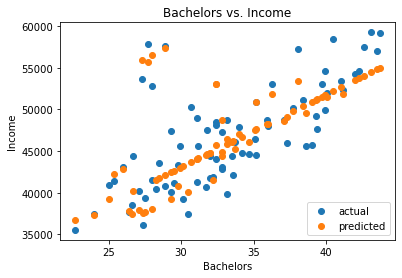

In [11]:
X2 = X_test["Bachelors"]

plt.scatter(X2, y_test, label="actual")
plt.scatter(X2, y_scaler.inverse_transform(model.predict(X_test_scaled)), label="predicted")

plt.legend()
plt.xlabel("Bachelors")
plt.ylabel("Income")
plt.title("Bachelors vs. Income")

plt.savefig("../static/images/IncomevsBachelors.png", bbox_inches='tight')

In [12]:
# Score data based on scaled model
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8740062983185769
Testing Score: 0.793080193914387


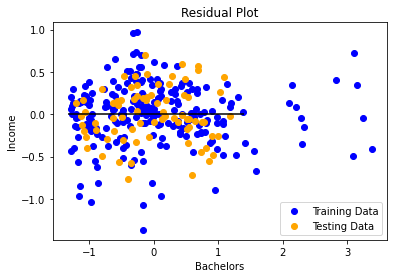

In [13]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.gca().set(xlabel='Bachelors', ylabel='Income')
# plt.show()

plt.savefig("../static/images/residual_plot.png", bbox_inches='tight')

# plt.show()

In [14]:
# Calculate MSE & R2 
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1010538299222123, R2: 0.793080193914387
